In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics

In [2]:
#Crime Data

In [3]:
C_df=pd.read_csv('/content/drive/MyDrive/Asignments_DS/crime_data.csv')
C_df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
C_df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [5]:
C_df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [6]:
C_df=C_df.rename({'Unnamed: 0':'City'},axis=1)

In [7]:
C_df.columns

Index(['City', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [8]:
C_df1 = C_df.iloc[:,1:]

In [9]:
C_df1.head(5)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [10]:
C_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [11]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [12]:
x = norm_func(C_df1.iloc[:,:])

In [13]:
x.head(10)

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


#K Means Clustering

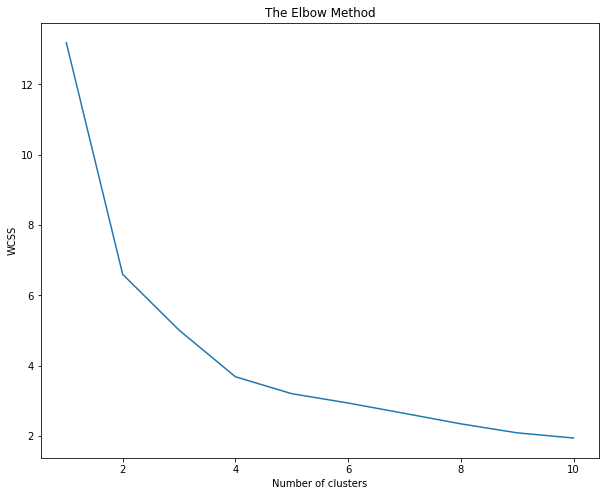

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
for i in range(3,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(x).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(x,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.32393600472652184
Silhouette score for k(clusters) = 4 is 0.3408903560074363
Silhouette score for k(clusters) = 5 is 0.31047828422452595
Silhouette score for k(clusters) = 6 is 0.27074591195713543
Silhouette score for k(clusters) = 7 is 0.27022032427504983
Silhouette score for k(clusters) = 8 is 0.2771980367413109
Silhouette score for k(clusters) = 9 is 0.29271198878660637
Silhouette score for k(clusters) = 10 is 0.23905346059641036
Silhouette score for k(clusters) = 11 is 0.24600415117232108
Silhouette score for k(clusters) = 12 is 0.2442092266823329


#We can see the number of optimum cluster is 4, hence we will be taking 4 as the cluster and start

In [16]:

model=KMeans(n_clusters=4)  
model.fit(x)
model.labels_

array([1, 3, 3, 1, 3, 3, 2, 2, 3, 1, 2, 0, 3, 2, 0, 2, 0, 1, 0, 3, 2, 3,
       0, 1, 3, 0, 0, 3, 0, 2, 3, 3, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 3, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [17]:
km = pd.Series(model.labels_) 
C_df['kclust']= km 
C_df.iloc[:,1:5].groupby(C_df.kclust).mean()

,Murder,Assault,UrbanPop,Rape
kclust,,,,
0,3.600000,78.538462,52.076923,12.176923
1,13.937500,243.625000,53.750000,21.412500
2,5.656250,138.875000,73.875000,18.781250
3,10.815385,257.384615,76.000000,33.192308


Text(0.5, 0.98, 'Relative comparison of customers in respective clusters')

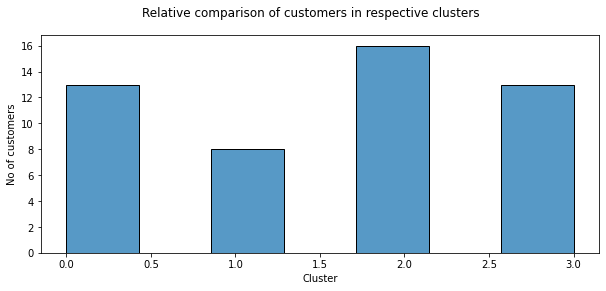

In [18]:
plt.figure(figsize=(10,4))
sns.histplot (x='kclust', data=C_df)
plt.xlabel('Cluster')
plt.ylabel('No of customers')
plt.suptitle('Relative comparison of customers in respective clusters')

#Hierarchical Clustering

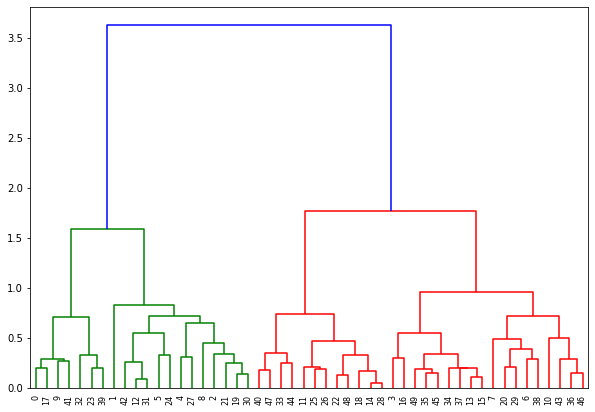

In [19]:
#Lets create Dindogram 
plt.figure(figsize=(10, 7))  
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line. If we decide a threshold of 1.5 and cut the dendrogram:

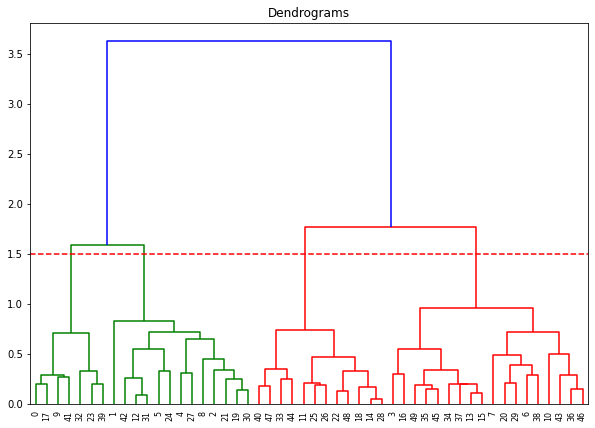

In [20]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(x, method='ward'))
plt.axhline(y=1.5, color='r', linestyle='--')
plt.show()

In [21]:
# create clusters
HiCl = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [22]:
y_hc = HiCl.fit_predict(x)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [23]:

Clusters.value_counts()

Clusters
0           47
3            1
2            1
1            1
dtype: int64

In [24]:
C_df['hc_clust']= Clusters
C_df.iloc[:,1:7].groupby(C_df.hc_clust).mean()

,Murder,Assault,UrbanPop,Rape,kclust,hc_clust
hc_clust,,,,,,
0,7.619149,163.87234,65.468085,20.625532,1.510638,0
1,5.900000,238.00000,72.000000,15.800000,2.000000,1
2,15.400000,335.00000,80.000000,31.900000,3.000000,2
3,10.000000,263.00000,48.000000,44.500000,3.000000,3


Text(0.5, 0.98, 'Relative comparison of cities in respective clusters')

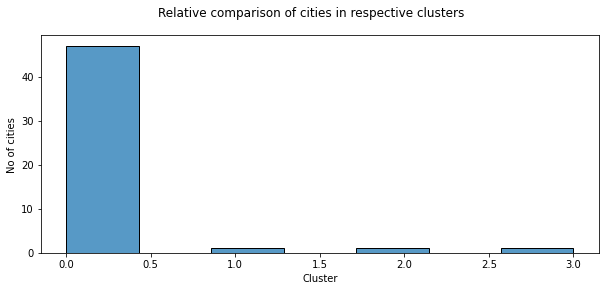

In [25]:
plt.figure(figsize=(10,4))
sns.histplot (x='hc_clust', data=C_df)
plt.xlabel('Cluster')
plt.ylabel('No of cities')
plt.suptitle('Relative comparison of cities in respective clusters')

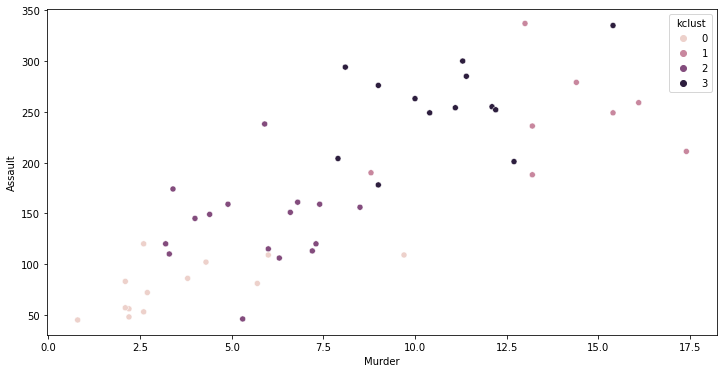

In [26]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=C_df['Murder'], y =C_df['Assault'], hue=C_df['kclust'])

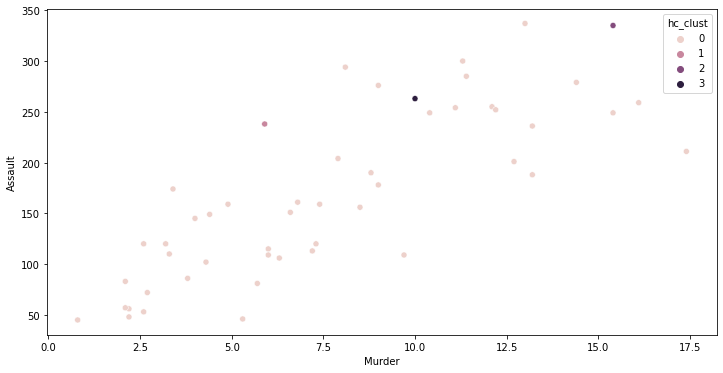

In [27]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=C_df['Murder'], y =C_df['Assault'], hue=C_df['hc_clust'])

#Airlines

In [29]:
A_df=pd.read_excel('/content/drive/MyDrive/Asignments_DS/EastWestAirlines.xlsx')
A_df

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN
5,(c) 2016 Galit Shmueli and Peter Bruce,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
9,ID#,NUMBER,NaN,Telcom,Unique ID
